# Q3

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu


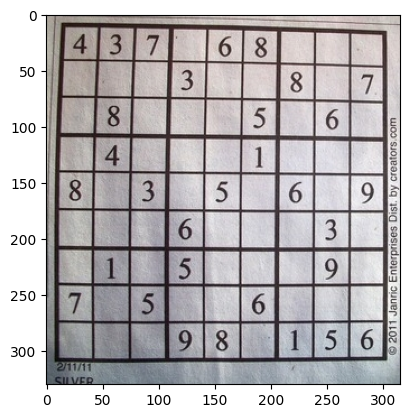

In [2]:
# Read the image
### YOUR CODE ###
img = imread("q3.jpg")
plt.imshow(img)

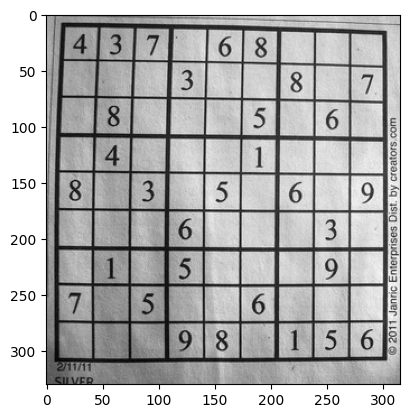

In [3]:
# Show the grayscale image
### YOUR CODE ###
gray_img = rgb2gray(img)
plt.imshow(gray_img, cmap='gray')

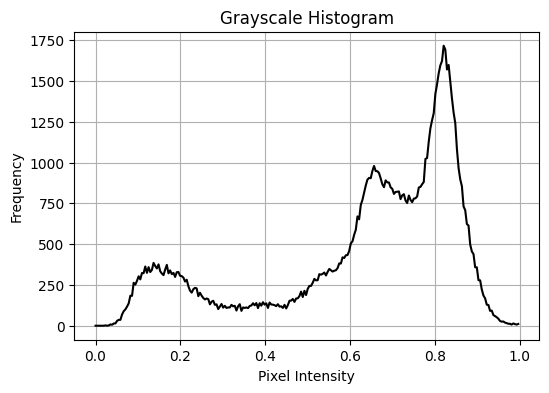

In [8]:
# generate and show histogram of grayscale image
### YOUR CODE ###
hist, bins = np.histogram(gray_img.ravel(), bins = 256, range=(0, 1))

plt.figure(figsize=(6, 4))
plt.plot(bins[:-1], hist, color='black')
plt.title('Grayscale Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [22]:
def threshold_otsu_impl(image, nbins=0.1):
    
    """
    For this method, do not use any pre-built methods for Otsu's thresholding 
    (such as cv2.otsu or skimage). Implement it using numpy.

    Parameters:
    - image (ndarray): A grayscale image represented as a 2D NumPy array.
    - nbins (float): The step size used to iterate through possible threshold values.
    
    Returns:
    - least_variance_threshold (float): The optimal threshold that minimizes the within-class variance.
    """

    ### YOUR CODE ##
    
    pixel_counts, edges = np.histogram(image.ravel(), bins=np.arange(0, 1 + nbins, nbins))
    bin_centers = edges[:-1] + nbins / 2
    total = image.size

    # print("Min:", image.min(), "Max:", image.max())
    least_variance_threshold = 0
    min_within_class_var = float('inf')

    for t in range(1, len(pixel_counts)):
        weight_bg = np.sum(pixel_counts[:t]) / total
        weight_fg = np.sum(pixel_counts[t:]) / total

        if weight_bg == 0 or weight_fg == 0:
            continue

        mean_bg = np.sum(pixel_counts[:t] * bin_centers[:t]) / np.sum(pixel_counts[:t])
        mean_fg = np.sum(pixel_counts[t:] * bin_centers[t:]) / np.sum(pixel_counts[t:])

        var_bg = np.sum(pixel_counts[:t] * (bin_centers[:t] - mean_bg) ** 2) / np.sum(pixel_counts[:t])
        var_fg = np.sum(pixel_counts[t:] * (bin_centers[t:] - mean_fg) ** 2) / np.sum(pixel_counts[t:])

        within_class_var = weight_bg * var_bg + weight_fg * var_fg

        if within_class_var < min_within_class_var:
            min_within_class_var = within_class_var
            least_variance_threshold = bin_centers[t]
            
    # print(least_variance_threshold)
    return least_variance_threshold

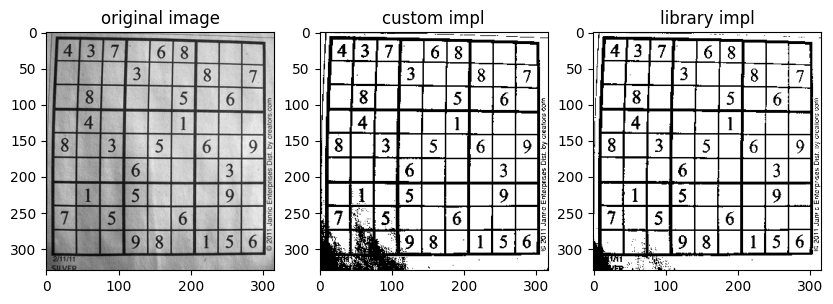

In [23]:
# Do not change this cell
# thresholding the image using our custom implementation
threshold_c = threshold_otsu_impl(gray_img)
bin_img_from_custom = gray_img > threshold_c
# print(bin_img_from_custom)
# thresholding the image using the pre-defiend skimage library implementation
threshold_s = threshold_otsu(gray_img)
bin_img_from_lib = gray_img > threshold_s

fig, ax = plt.subplots(ncols=3, figsize=(10, 5))
ax[0].set_title("original image")
ax[0].imshow(gray_img, cmap="gray")

ax[1].set_title("custom impl")
ax[1].imshow(bin_img_from_custom, cmap="gray")

ax[2].set_title("library impl")
ax[2].imshow(bin_img_from_lib, cmap="gray")